# A4: Visualization for Exploratory Data Analysis

* [Exploratory real estate data analysis](#EDA)
* [Submission](#Submission)

## Background and Objective

Effective use of graphs as visual representations of data is an important skill for a data scientist. [Lecture 4](https://coursys.sfu.ca/2024sp-cmpt-733-g1/pages/lec4) gave you an introduction to principles of visualization design. In this assignment we will apply these principles when working with real-estate data.

After completing this assignment, you should be able to use, create, and improve data plots to make them effective tools to find and carry messages from your data.
We will perform visual data analysis using Python and gain experience with geospatial data.

### Further reading

**Stephen Few, "Show me the numbers - Designing Tables and Graphs to Enlighten", (2nd Ed.), Analytics Press, 2012**

In addition to the reference given in the lecture, Stephen Few's book "Show me the Numbers" is an excellent source on the principles of visual design for data analysis. Chapter 6 shows which types of graphs are suitable for different types of data and questions. Note that *marks* are called *value-encoding objects*.

As further motivating example of how visualization can bring data to life and clear up misconceptions, consider to watch [Hans Rosling's famous TED talks](https://www.ted.com/playlists/474/the_best_hans_rosling_talks_yo), e.g. "The best stat's you've ever seen" from 2006.

### Lab environment

As with A1 and A2, the conda environment in the lab at location
`/usr/shared/CMPT/big-data/condaenv/gt`
has all dependencies for this assignment installed.

## Real Estate EDA

**Real estate data**

Imagine you are a data scientist working at a real-estate company. In this week, your job is to analyze Vancouver housing prices. First, inspect the dataset provided via OneDrive link: [property_tax_report_2023.zip](https://1sfu-my.sharepoint.com/:u:/g/personal/sbergner_sfu_ca/EeHhDuSuAO5Hh6noBM_czBgBtunRYLjY-JXxL2l9yeQWSg?e=iCWZWU). The dataset contains information on properties from BC Assessment (BCA) and City sources in 2023.
You can find the schema information of the dataset from the [Vancouver Open Data Portal](https://opendata.vancouver.ca/explore/dataset/property-tax-report/information/).
Familiarize yourself with the context and background info on that page before diving deeper into Exploratory Data Analysis.

We first load the data as a DataFrame. To make this analysis more interesting, we will add two new columns to the data: `CURRENT_PRICE` represents the property price in 2021; `PREVIOUS_PRICE` represents the property price in 2020.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Markdown
def displaymd(mdstr):
    display(Markdown(mdstr))

In [2]:

# use this in case you have a hidpi display and figures appear blurry
#%config InlineBackend.figure_format = 'retina'

# before running this, unzip the provided data
df = pd.read_csv("property-tax-report_2023.zip", sep=';')

df['CURRENT_PRICE'] = df.apply(lambda x: x['CURRENT_LAND_VALUE']+x['CURRENT_IMPROVEMENT_VALUE'], axis = 1)

df['PREVIOUS_PRICE'] = df.apply(lambda x: x['PREVIOUS_LAND_VALUE']+x['PREVIOUS_IMPROVEMENT_VALUE'], axis = 1)


Let's embark on the Exploratory Data Analysis (EDA) process.

**Hint:** For some of the upcoming questions, we've provided example outputs in [A4-plots.html](A4-plots.html) for format comparison, as well as additional plots. However, remember that you are not required to replicate the same plot design exactly. Additionally, your tables will be based on a different data snapshot. Since the plot examples provided here did not fully adhere to the *Principles of Visualization Design* as outlined in the second half of the slides from Lecture 4, I encourage you to review this section independently. As you proceed, think critically about how you might rectify some of the less effective design choices in these examples.

### Question 1. Look at some example rows
Print the first five rows of the data:

In [3]:
# --- Write your code below ---
df.head(5)

,PID,LEGAL_TYPE,FOLIO,LAND_COORDINATE,ZONING_DISTRICT,ZONING_CLASSIFICATION,LOT,PLAN,BLOCK,DISTRICT_LOT,...,TAX_ASSESSMENT_YEAR,PREVIOUS_LAND_VALUE,PREVIOUS_IMPROVEMENT_VALUE,YEAR_BUILT,BIG_IMPROVEMENT_YEAR,TAX_LEVY,NEIGHBOURHOOD_CODE,REPORT_YEAR,CURRENT_PRICE,PREVIOUS_PRICE
0,004-679-687,STRATA,606108040018,60610804,RM-5B,Multiple Dwelling,18,VAS1694,NaN,185,...,2021.0,494000.0,191000.0,1986.0,1986.0,2104.20,27,2021,720000.0,685000.0
1,015-163-695,LAND,598250070000,59825007,CD-1 (97),Comprehensive Development,15,VAP729,D,183,...,2021.0,5124000.0,4761000.0,1979.0,1981.0,32355.00,14,2021,9896000.0,9885000.0
2,012-215-023,STRATA,615115480004,61511548,RM-5A,Multiple Dwelling,4,VAS2283,NaN,185,...,2021.0,353000.0,173000.0,1989.0,1989.0,1586.93,27,2021,543000.0,526000.0
3,010-816-682,LAND,594190230000,59419023,HA-1A,Historical Area,11,VAP184,16,196,...,2021.0,3100000.0,31900.0,1982.0,1982.0,12169.30,26,2021,3289000.0,3131900.0
4,025-696-301,STRATA,618138950055,61813895,CD-1 (366),Comprehensive Development,55,BCS435,NaN,NaN,...,2021.0,1208000.0,318000.0,2003.0,2003.0,4374.99,30,2021,1497000.0,1526000.0


### Question 2. Get summary statistics

From the above output, you will know that the data has 28 columns. Please use the describe() function to get the summary statistics of each column.
Also, to improve readability use a pandas [DataFrame Styler](https://pandas.pydata.org/pandas-docs/stable/user_guide/style.html) to format the numbers without scientific notation (i.e. no floating point exponent).

In [4]:
# --- Write your code below ---

# Convert the column to float
df.describe().style.format(lambda x: '{:.2f}'.format(x))

,FOLIO,LAND_COORDINATE,TO_CIVIC_NUMBER,CURRENT_LAND_VALUE,CURRENT_IMPROVEMENT_VALUE,TAX_ASSESSMENT_YEAR,PREVIOUS_LAND_VALUE,PREVIOUS_IMPROVEMENT_VALUE,YEAR_BUILT,BIG_IMPROVEMENT_YEAR,TAX_LEVY,NEIGHBOURHOOD_CODE,REPORT_YEAR,CURRENT_PRICE,PREVIOUS_PRICE
count,1095658.00,1095658.00,1092849.00,1080672.00,1080672.00,1080672.00,1069042.00,1069042.00,1063540.00,1063540.00,861597.00,1095658.00,1095658.00,1080672.00,1069042.00
mean,499034199576.25,49903419.95,2392.95,1781566.50,458030.43,2022.02,1765271.04,439447.49,1984.57,1992.02,8964.33,16.55,2022.02,2239596.93,2204718.53
std,249738119589.31,24973811.96,1997.38,10226625.68,4844054.66,1.41,10149056.64,4602386.07,29.77,19.69,64799.24,8.94,1.41,12713400.09,12474189.62
min,19632060000.00,1963206.00,1.00,0.00,0.00,2020.00,0.00,0.00,1800.00,200.00,0.00,1.00,2020.00,0.00,0.00
25%,210698480001.00,21069848.00,939.00,509000.00,103000.00,2021.00,499000.00,101000.00,1973.00,1980.00,1952.38,9.00,2021.00,699000.00,687000.00
50%,613113030004.00,61311303.00,1783.00,1001000.00,197000.00,2022.00,994000.00,193000.00,1994.00,1995.00,3982.43,16.00,2022.00,1235000.00,1221300.00
75%,690084470000.00,69008447.00,3357.00,1730000.00,326000.00,2023.00,1652000.00,317000.00,2006.00,2007.00,7135.74,25.00,2023.00,2020000.00,1944375.00
max,845313420000.00,84531342.00,31888.00,3606388000.00,934655000.00,2024.00,3568531000.00,876401000.00,2022.00,2022.00,9760300.00,30.00,2024.00,3617073000.00,3578633000.00


Please look at the above output carefully, and make sure that you understand the meanings of each row (e.g., std, 25% percentile).

### Question 3. Examine missing values

Now we are going to perform EDA on a single column (i.e., univariate analysis). We chose `YEAR_BUILT`, which represents in which year a property was built.  We first check whether the column has any missing value. 

In [5]:
# --- Write your code below ---
# Print the percentage of the rows whose YEAR_BUILT is missing.
missing_values = df['YEAR_BUILT'].isnull().sum()
total_rows = df.shape[0]

print(f'Missing values: {(missing_values/total_rows) * 100:.2f}%')

Missing values: 2.93%


Missing values are very common in real-world datasets. In practice, you should always be aware of the impact of the missing values on your downstream analysis results.

### Question 4.  Plot a line chart

We now start investigating the values in the `YEAR_BUILT` column.  Suppose we want to know: "How many properties were built in each year (from 1900 to 2018)?" Please plot a line chart to answer the question.

/Users/michaelkuby/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/michaelkuby/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/michaelkuby/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/michaelkuby/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version

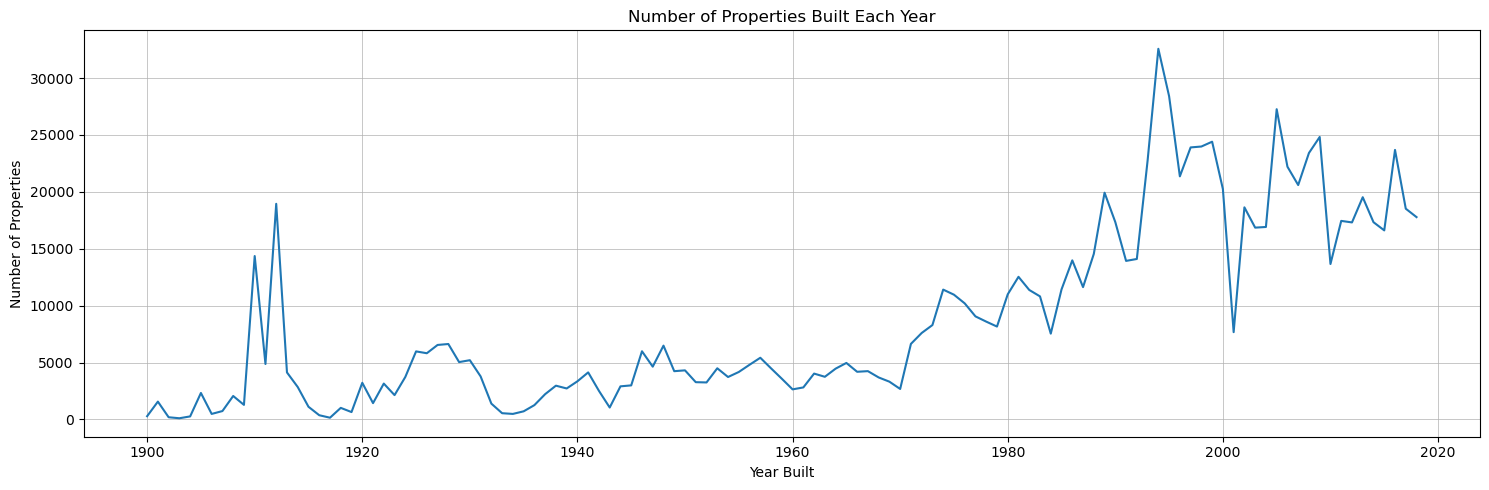

In [6]:
# --- Write your code below ---

# Group by Year Built and get the counts for each year
counts = df.groupby('YEAR_BUILT')['YEAR_BUILT'].count()
counts = counts.reset_index(name='Count')

# Select the years we are interested in
num_properties = counts[(counts['YEAR_BUILT'] >= 1900) & (counts['YEAR_BUILT'] <= 2018)]

# Plot the results
plt.figure(figsize=(15, 5))
sns.lineplot(x=num_properties['YEAR_BUILT'], y=num_properties['Count'])

plt.grid(linewidth=0.5)
plt.title('Number of Properties Built Each Year')
plt.xlabel('Year Built')
plt.ylabel('Number of Properties')
plt.tight_layout()

Please write down the **two** most interesting findings that you draw from the plot. For example, you can say: <font color='cyan'>"Vancouver has about 6300 properties built in 1996 alone, which is more than any other year"</font>.

**Findings**
1. I find it remarkable how many properties were built in the early 1910's. There looks to be two years prior to 1920 where the number of properties built is not matched for another 70 years.
2. The crash in property production in 2001 interests me. Compared to the surrounding years, it is a notable fall in production to levels not seen since the mid 1980's.

### Question 5. Plot a bar chart

Next, we want to find that, between 1900 and 2021, which years have the most number of properties been built? Plot a bar chart to show the top 20 years. 

In [7]:
# --- Write your code below ---

# Select all properties built between 1900 - 2021, group by year built and get the counts.
num_properties2 = counts[(counts['YEAR_BUILT'] >= 1900) & (counts['YEAR_BUILT'] <= 2021)].copy()

# Create a new column that ranks the properties based on the counts
num_properties2['Rank'] = num_properties2['Count'].rank(ascending=False)
num_properties2 = num_properties2.sort_values(by='Count', ascending=False).reset_index(drop=True)

# Select only the top 20 rows
top_20 = num_properties2[:20].copy()

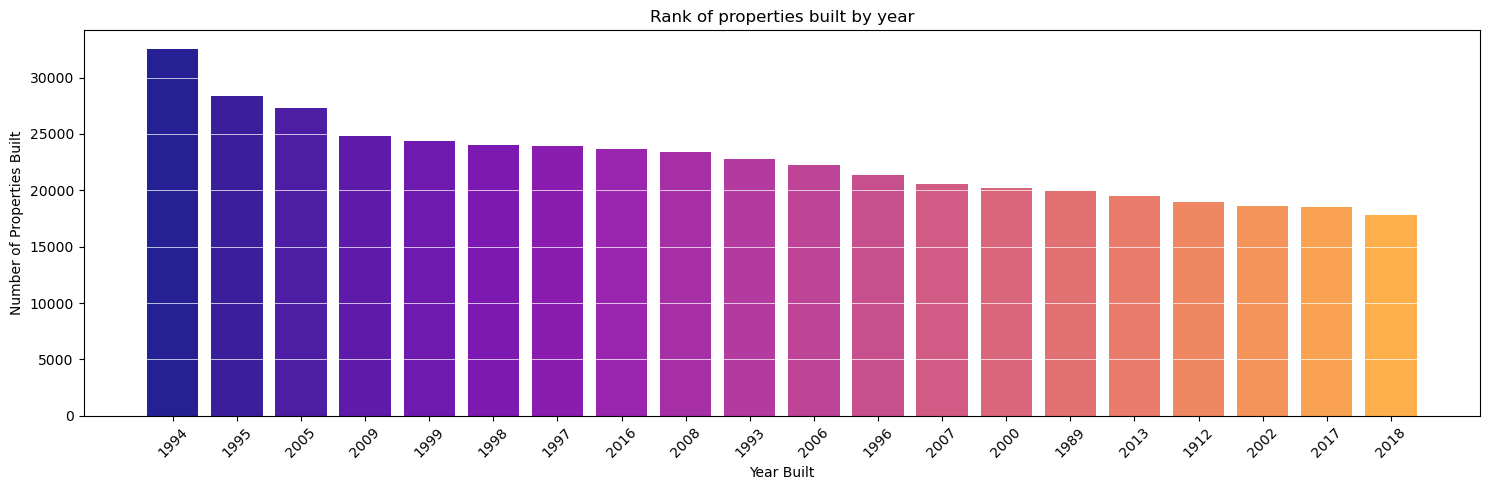

In [8]:
import numpy as np

# Create a colour map
colours = plt.cm.plasma(np.linspace(0, 0.8, len(top_20)))  # Use the viridis colormap

# Plot a bar chart to show the top 20 years
plt.figure(figsize=(15, 5))
plt.grid(color='white', which='major', axis='y', linewidth=0.5)
plt.bar(top_20.index, top_20['Count'], color=colours, alpha=0.9)

# Convert column 'YEAR_BUILT' to int64 and adjust xticks
top_20['YEAR_BUILT'] = top_20['YEAR_BUILT'].astype('int64')
plt.xticks(ticks=top_20.index, labels=top_20['YEAR_BUILT'], rotation=45)
plt.title('Rank of properties built by year')
plt.ylabel('Number of Properties Built')
plt.xlabel('Year Built')
plt.tight_layout()

Please write down the **two** most interesting findings that you draw from the plot.

**Findings**
1. The most interesting finding that jumps out to me is that every single one of the top 20 years has occurred since 1989.
2. It also jumpts out to me that 5 of the top 7 years occurred in the 1990's, including the top 2 years (1994-95), suggesting explosive and unrivaled growth during that time period.

### Question 6. Plot a histogram

What's the distribution of the number of properties built between 1900 and 2020? Please plot a histogram to answer this question.

([<matplotlib.axis.XTick at 0x176570f10>,
 [Text(0, 0, '0'),
  Text(2500, 0, '2500'),
  Text(5000, 0, '5000'),
  Text(7500, 0, '7500'),
  Text(10000, 0, '10000'),
  Text(12500, 0, '12500'),
  Text(15000, 0, '15000'),
  Text(17500, 0, '17500'),
  Text(20000, 0, '20000'),
  Text(22500, 0, '22500'),
  Text(25000, 0, '25000'),
  Text(27500, 0, '27500'),
  Text(30000, 0, '30000'),
  Text(32500, 0, '32500')])

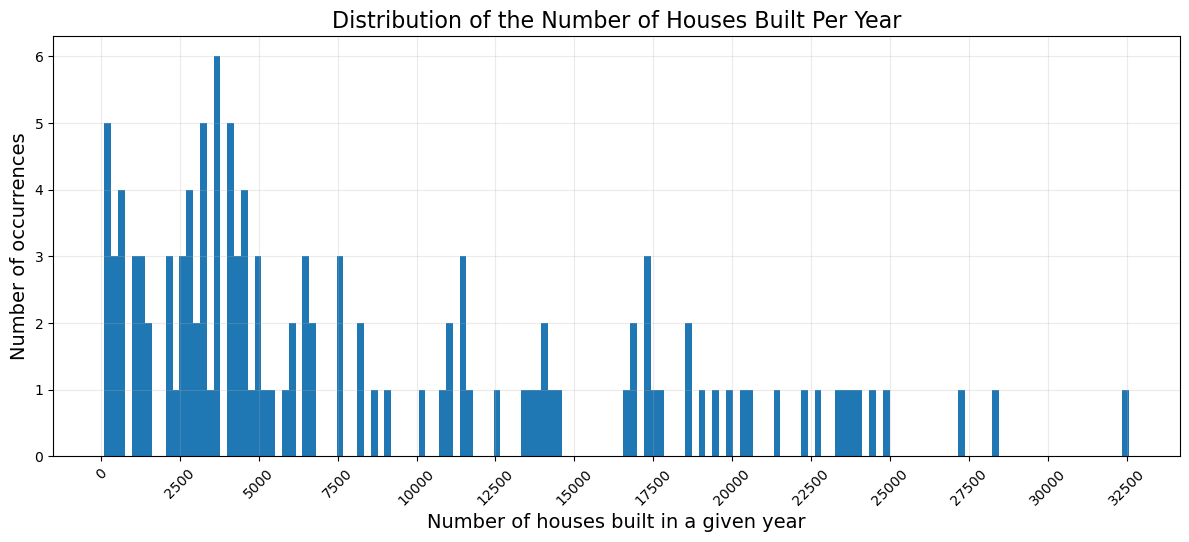

In [9]:
# --- Write your code below ---

# Procure the number of properties built between 1900 and 2020
num_properties3 = counts[((counts['YEAR_BUILT'] >= 1900) & (counts['YEAR_BUILT'] <= 2020))].copy()

plt.figure(figsize=(12,5.25))
plt.grid(alpha=0.25)
plt.hist(num_properties3['Count'], bins=150)
plt.title('Distribution of the Number of Houses Built Per Year', fontsize=16)
plt.xlabel('Number of houses built in a given year', fontsize=14)
plt.ylabel('Number of occurrences', fontsize=14)
plt.tight_layout()

# Set x-ticks at an increased frequency
plt.xticks(ticks=np.arange(0, counts['Count'].max() , 2500), rotation=45)

Please write down the **two** most interesting findings that you draw from the plot.

**Findings**
1. The number of times (5) that almost zero properties were built is tied for the second most common count.
2. It is clear that a level of production between 2500 and 5000 is extremely common.

### Question 7. Make a scatter plot

Suppose we are interested in those years which built more than 2000 properties. Make a scatter plot to examine whether there is a relationship between the number of built properties and the year?

Text(0.5, 0, 'Year')

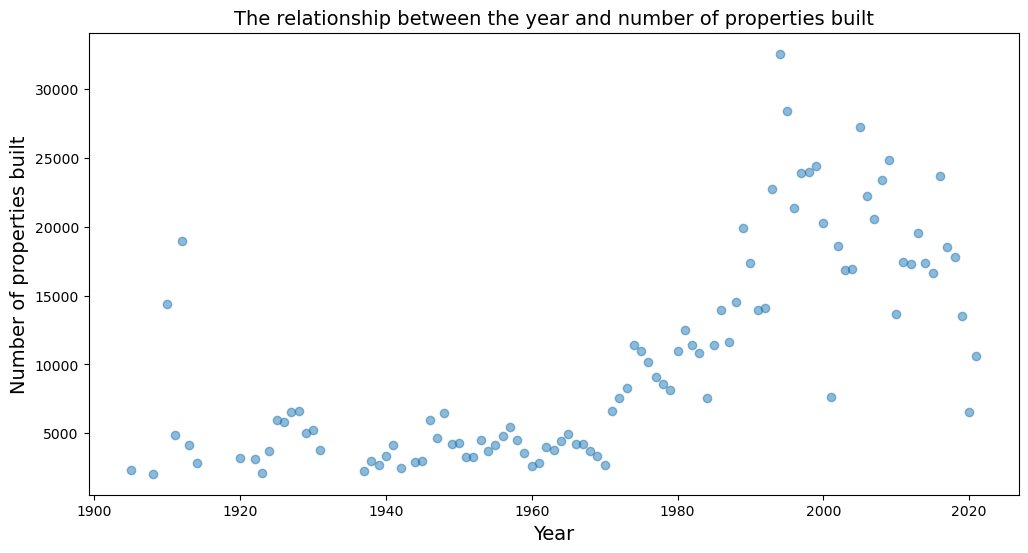

In [10]:
# --- Write your code below ---

# Retrieve all those years in which more than 2000 properties were built
twoK_plus = counts[counts['Count'] > 2000].copy()

# Produce a scatter plot to examine whether there is a relationship between the number of b uilt properties and the year
plt.figure(figsize=(12,6))
plt.scatter(x=twoK_plus['YEAR_BUILT'], y=twoK_plus['Count'], alpha=0.5)
plt.title('The relationship between the year and number of properties built', fontsize=14)
plt.ylabel('Number of properties built', fontsize=14)
plt.xlabel('Year', fontsize=14)

Please write down the **two** most interesting findings that you draw from the plot.

**Findings**
1. Growth looked fairly stable with a small amount of variance up until 1970 or so, at which point we experienced exponential growth in production until the mid 2000's.
2. Production levels from the 1910's until about 1970 looks cyclical: we see a wave pattern that oscillates with a peak and then a valley and then another peak. After around 1980 it appears to me that this cyclical pattern is lost and becomes significantly more random.

### Step 8. Obtain geographic coordinates for Canadian postal codes

The property data carries Canadian postal codes, but latitude/longitude coordinates would be much more useful. Unfortunately, geolocations of Canadian postal codes are protected by copyright and the information has to be purchased. Fortunately, you already paid for it with your tuition...

Statistics Canada has a protected dataset, the postal code conversion file, which is available to SFU students via the Abacus Dataverse. Please follow these steps:
* Have a valid SFU account (not sure if alumni account would work)
* Connect to the Abacus Data Network via https://databases.lib.sfu.ca/record/61245148090003610/Abacus-Data-Network
* Connecting via the above link should show you as logged in user at https://abacus-library-ubc-ca.proxy.lib.sfu.ca/
* Search for: **Postal Code Conversion File May 2021**
* Download files: **pccfNat_fccpNat_052021.txt** and the [2021 PCCF Guide .pdf](https://abacus.library.ubc.ca/file.xhtml?persistentId=hdl:11272.1/AB2/9J8YUH/WJHERN&version=1.0) and place them in the same folder as this notebook.

#### Details about the dataset in the 2021 PCCF Guide
* Description of available fields for each postal code, see Content section, pp. 9
* Offsets and Size of fields to extract from lines in Postal Code Conversion File, Table 4.1, p. 11.  
  This is also included along with this notebook as **pccf_record_layout.csv**

In [11]:
rldf = pd.read_csv('pccf_record_layout.csv')
# load the raw text pccf file
with open('pccfNat_fccpNat_052021.txt','r', encoding='latin-1') as fh:
    pctxt = fh.read()
pclines = pctxt.split('\n')
pclines = list(filter(lambda l: len(l), pclines)) # keep only non-empty lines
displaymd(f"Number of lines in PCCF: {len(pclines):,}")

Number of lines in PCCF: 1,742,403

The following extraction of substrings works, but is *very slow*. Please use [pandas string methods](https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html#string-methods) to make this faster.  
**TODO** write your improved code here.

In [12]:
# TODO: rewrite this function to make it run in about a minute (or just maybe 17 sec)
# def gen_pccf():
#     def row_slice():
#         for l in pclines:
#             yield l[r['Position']-1:r['Position']+r['Size']-1]
#     for idx, r in rldf.iterrows():
#         print(idx, r['Field name'])
#         yield r['Field name'], list(row_slice())
# pccf_df = pd.DataFrame(dict(gen_pccf()))

def gen_pccf(pclines, rldf):
    # Ensure pclines is a Series for string operations
    if isinstance(pclines, pd.DataFrame):
        pclines_series = pclines.iloc[:, 0]  # Assuming text is in the first column
    else:
        pclines_series = pd.Series(pclines)
    
    # Initialize an empty DataFrame for the results
    result_df = pd.DataFrame()
    
    # Iterate over the rows of rldf to apply slicing
    for _, row in rldf.iterrows():
        field_name = row['Field name']
        start = row['Position'] - 1  # 0-based indexing
        end = start + row['Size']
        
        # Use string slicing to create the new column in result_df
        result_df[field_name] = pclines_series.str[start:end]
    
    return result_df

pccf_df = gen_pccf(pd.DataFrame(pclines), rldf)

In [13]:
pccf_df['LAT'] = pccf_df['LAT'].astype(float)
pccf_df['LONG'] = pccf_df['LONG'].astype(float)
pccf_short = pccf_df[['Postal code', 'LONG', 'LAT', 'CSDname']]
pccf_short = pccf_short.groupby('Postal code').agg({'LONG':'mean','LAT':'mean','CSDname':'first'})

Now we're ready to merge geolocation to our property data.

In [14]:
df['Postal code'] = df['PROPERTY_POSTAL_CODE'].str.replace(' ','')
dfgeo = df.merge(pccf_short, on='Postal code')

In [15]:
dfgeo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1070445 entries, 0 to 1070444
Data columns (total 35 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   PID                         1068622 non-null  object 
 1   LEGAL_TYPE                  1070445 non-null  object 
 2   FOLIO                       1070445 non-null  int64  
 3   LAND_COORDINATE             1070445 non-null  int64  
 4   ZONING_DISTRICT             1070431 non-null  object 
 5   ZONING_CLASSIFICATION       1066481 non-null  object 
 6   LOT                         1064451 non-null  object 
 7   PLAN                        1069962 non-null  object 
 8   BLOCK                       436116 non-null   object 
 9   DISTRICT_LOT                1017663 non-null  object 
 10  FROM_CIVIC_NUMBER           536766 non-null   object 
 11  TO_CIVIC_NUMBER             1069589 non-null  float64
 12  STREET_NAME                 1070340 non-null  object 
 1

**TODO Outlier check**: Please take a look at the property locations by using a suitable visualization.
You can use the longitude and latitude information to plot the properties. Pick a suitable visualization to decide the right cutoff.
The goal is to check for outliers and remove them if necessary. 

Depending on the postal code PCCF year you are using, there can be outliers.
In case there are locations outside Vancouver, e.g. near Squamish, BC, outside Vancouver proper, please remove them.

If you decide to remove some postal codes, please write a comment explaining your decision.
Also, if after viewing the plot, you decide that all postal code locations are within Vancouver,
please write a comment to that effect.

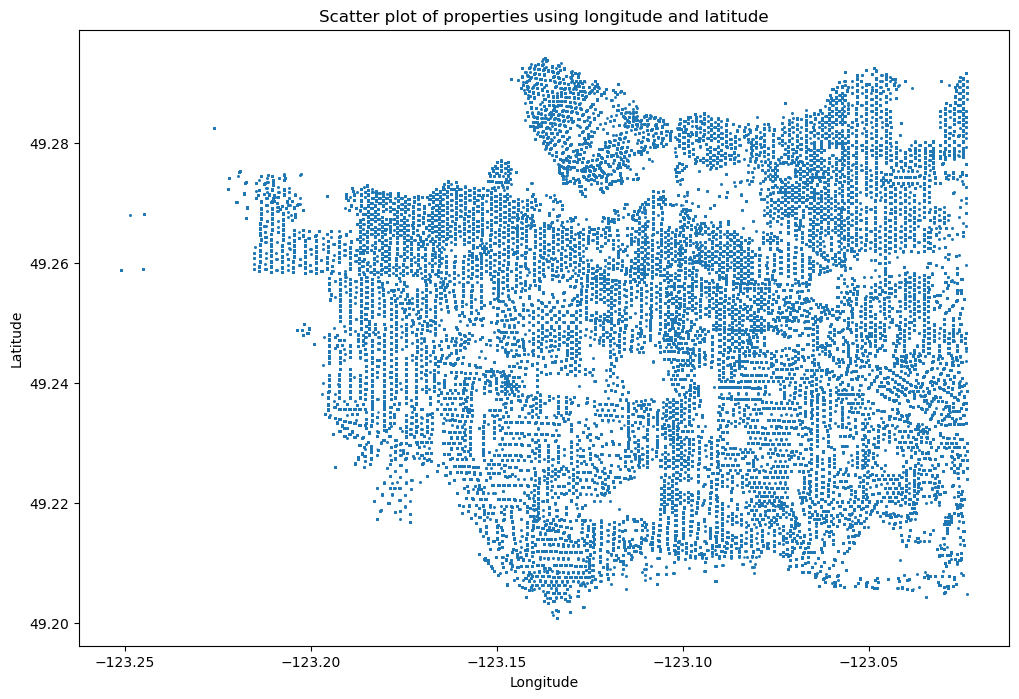

In [16]:
# See the TODO above.

# --- write your code here ---

# Create a scatter plot of the properties using the longitude and latitude
plt.figure(figsize=(12, 8))
plt.scatter(dfgeo['LONG'], dfgeo['LAT'], alpha=0.75, s=0.5)
plt.title('Scatter plot of properties using longitude and latitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Find the postal code associated with longitude less than -123.23
postal_code1 = dfgeo[dfgeo['LONG'] < -123.23]['Postal code'].unique()
# postal_code # These belong to UBC

# Find the postal codes associated with latitude less than 49.22 and longitude less than -123.165
postal_codes2 = dfgeo[(dfgeo['LAT'] < 49.22) & (dfgeo['LONG'] < -123.165)]['Postal code'].unique()
# postal_codes # These are all a part of vancouver proper

# Find the postal codes associated with latitude less than 49.21 and longitude greater than -123.05
postal_codes3 = dfgeo[(dfgeo['LAT'] < 49.21) & (dfgeo['LONG'] > -123.05)]['Postal code'].unique()
# postal_codes2 # These are all on the boundary between Vancouver and Burnaby, but appear to be Vancouver.

# Find the postacl codes associated with latitude less than 49.21 and longitude less than -123.10
postal_codes4 = dfgeo[(dfgeo['LAT'] < 49.21) & (dfgeo['LONG'] < -123.10)]['Postal code'].unique()
# postal_codes4 # Contains Postal codes starting with V6P and V5X, which appear to be in Vancouver.

# Find the postal codes associated with longitude greater than -123.0525 and latitude greater than 49.28
postal_codes5 = dfgeo[(dfgeo['LONG'] > -123.0525) & (dfgeo['LAT'] > 49.28)]['Postal code'].unique()
# postal_codes5 # associated with V5K and all appear to be on the Vancouver side of the boundary.

Postal codes and boundaries checked using google maps:

1. V5K - These all belong to the Vancouver side of the boundary
2. V6T - These all belong to UBC and hence UBC
3. V6N - These all belong to Vancouver
4. V5S - These all belong to Vancouver
5. V6P and V5X - These all also belong to Vancouver

So, despite the fact that some of these look like they were outliers, we move forward deciding not to remove any postal codes.

In [17]:
dfgeo_van = dfgeo.copy()

Feel free to use the function below to prepare a heatmap of averages. The code is based on [Matthew McGonagle's blog post](https://matthewmcgonagle.github.io/blog/2019/01/22/HeatmapBins).

In [66]:
def heatmap_bins(data, fieldsxy, ncuts=30, aggarg='mean'):
    """Perform data.groupby using bin cuts along columns named in fieldsxy.
    Args:
        data     - pandas dataframe
        fieldsxy - list of column names along which to perform binned groupby
        ncuts    - number of cuts to perform for each field (see pd.cut)
        aggarg   - aggregation operation to perform, default: 'mean'
    Returns:
        grouped dataframe, ready for plotting via sns.heatmap(means['COLUMNAME'])
    """
    # based on: https://matthewmcgonagle.github.io/blog/2019/01/22/HeatmapBins
    cuts = pd.DataFrame({str(feature) + ' bins' : pd.cut(data[feature], ncuts) for feature in fieldsxy})
    means = data.join(cuts).groupby( list(cuts), observed=False ).agg(aggarg, numeric_only=True)
    means = means.unstack(level = 0) # Use level 0 to put 0Bin as columns.
    # Reverse the order of the rows as the heatmap will print from top to bottom.
    means = means.iloc[::-1]
    return means

**TODO** plot a heatmap of average current property prices, within the same geographic area

Note that the colormap may be useless due to a few extreme values. Rather than removing them as 'outliers', please just map the values before drawing with a suitable choice of logarithm.

([], [])

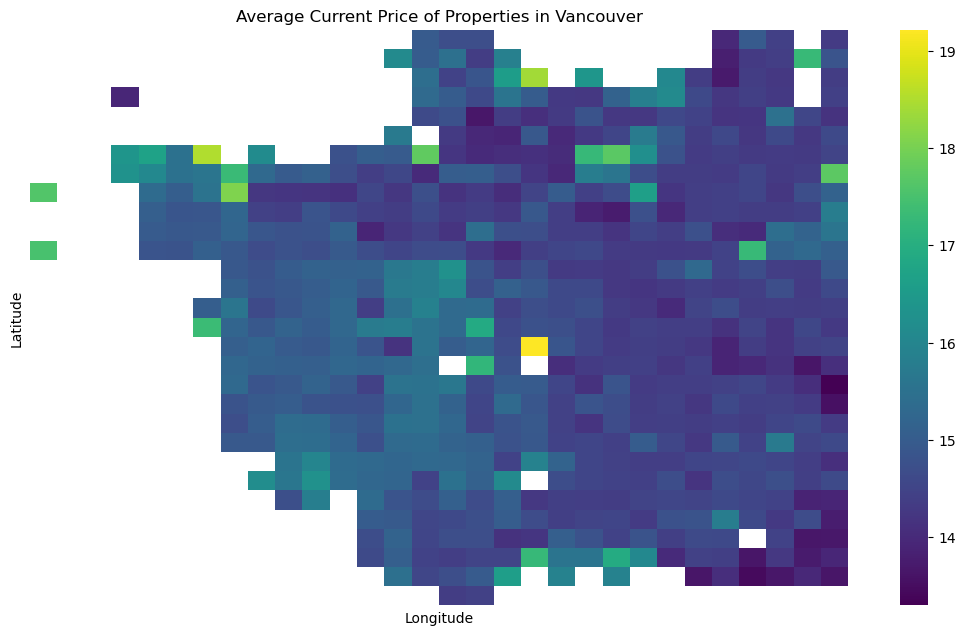

In [79]:
field = 'CURRENT_PRICE'

with plt.rc_context({'figure.figsize': (12,8)}):
    # TODO -- write your code here ---
    # Create a heatmap of the average current price of properties in Vancouver
    # using the longitude and latitude
    means = heatmap_bins(dfgeo_van, ['LONG','LAT'])

    # Use a logarithmic transformation to make the graph more meaningful
    log_transform = np.log1p(means[field])

    sns.heatmap(log_transform, cmap='viridis')
    plt.title('Average Current Price of Properties in Vancouver')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.tight_layout()
plt.xticks([], [])
plt.yticks([], [])

Please write down the **two** most interesting findings that you draw from the plot. 

**Findings**
1. The bottom right quadrant of the graph is, in general, much darker than the rest of the graph, and has less greens and yellows, indicating that property values in this part of the city are, on average, lower than the other three quadrants.
2. If you slice Vancouver vertically into two, using the yellow square directly in the middle of the city as the median, it appears that average property values increase as we move closer to the west, which is also closer to the ocean.


### Task 9: Integrate with BC Assessment data

BC Assessment is a governmental institution that provides valuation estimates for real-estate properties, so-called folios, around British Columbia.

SFU Library recently obtained access to the BCA Advice data, subject to conditions laid out in their End-user license agreement (EULA), for instance:
* free for research and classroom use only
* publication of results only with BCA consent (i.e. no public github repo with data or results)
* follow further criteria listed in the EULA.

In order to use the dataset we prepared, you have to agree to the [EULA](https://1sfu-my.sharepoint.com/:b:/g/personal/sbergner_sfu_ca/ETLyzV-EYN5EpUVavrW7oxoB_ZOTnrsruwOqD3gEDO8Cvw?e=86wFlm) provided by BCA.

**Please follow the steps in the [BCA EULA sigsheet](https://1sfu-my.sharepoint.com/:x:/g/personal/sbergner_sfu_ca/EVXLCM0ikLdDrZ6_RHnlRhcBm1edMIcSaRrZcugM83nHWw?e=uYD9v8) to obtain the dataset.**

In [ ]:
# Load the dataset

bcadf = pd.read_csv('bca-data/sales-residential-2022-cleaned.csv')

#### 9.a Add latitude and longitude info

**TODO:** Obtain geographic coordinates for Canadian postal codes and merge them with existing dataframe

Use the `pccf_df` that you made before and join it with the bca data. Ensure that you get latitude and longitude, as well as, CSDname of the city or community for each folioID.


In [ ]:
# TODO write your code here

#### 9.b Create a quantitative map of Vancouver properties

Use the CSDName and limit the dataset to foloID's for `Vancouver` only. Then  perform the following:

Create a plot of `conveyancePrice` on a map. You can either draw individual color coded points or construct a heatmap using code from before.

#### 9.c Create one or multiple plots to explore possible relationships between other quantitative variables and conveyancePrice

For this question, please use the entire dataset.

1. Create a plot that shows how `conveyancePrice` relates to two (or more) other quantitative variables. We are hoping to use this plot to think about possible modeling choices for price predictions.

In [4]:
# TODO write your code

## Submission

You need to complete the first part by filling out this notebook. Please submit <font color="blue">A4.ipynb</font> to the CourSys activity [Assignment 4](https://courses.cs.sfu.ca/2024sp-cmpt-733-g1/+a4/). 